In [3]:
import import_ipynb
from analysisMagic import dfm4
from analysisPokemon import dfp2

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

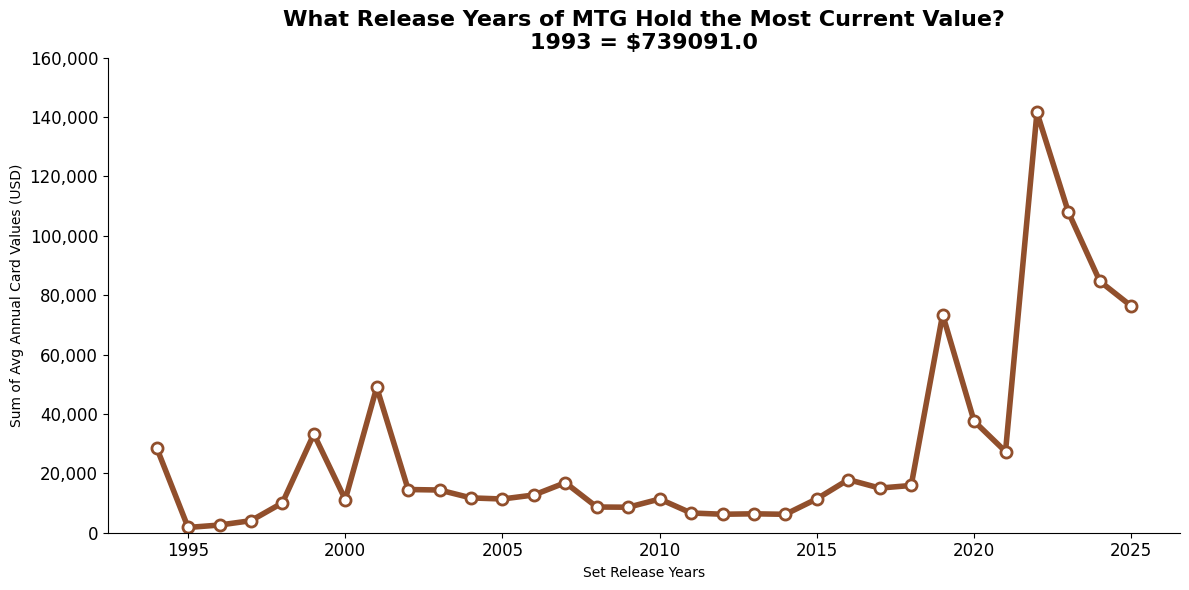

In [11]:
plt.figure(figsize=(12,6))

no1993 = dfm4[dfm4['releaseYear'] != 1993]             # 1993 really skews the data, so I'll add it as a f-string in the title
sumPerYearNo1993 = no1993.groupby("releaseYear")["avgPrice"].sum().reset_index()


plt.plot(sumPerYearNo1993["releaseYear"], sumPerYearNo1993["avgPrice"], color="#914F2C", linewidth=4, marker="o", markersize = 8, markerfacecolor = "#FFFFFF", markeredgewidth = 2)
plt.ylim(0, 160000)
plt.xlabel("Set Release Years")
plt.ylabel("Sum of Avg Annual Card Values (USD)")

value1993 = dfm4.loc[dfm4["releaseYear"] == 1993, "avgPrice"].sum().round()
plt.title(f"What Release Years of MTG Hold the Most Current Value?\n1993 = ${value1993}", fontsize=16, fontweight="bold", color="black")

ax = plt.gca()
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}')) # to show thousands comma for y-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

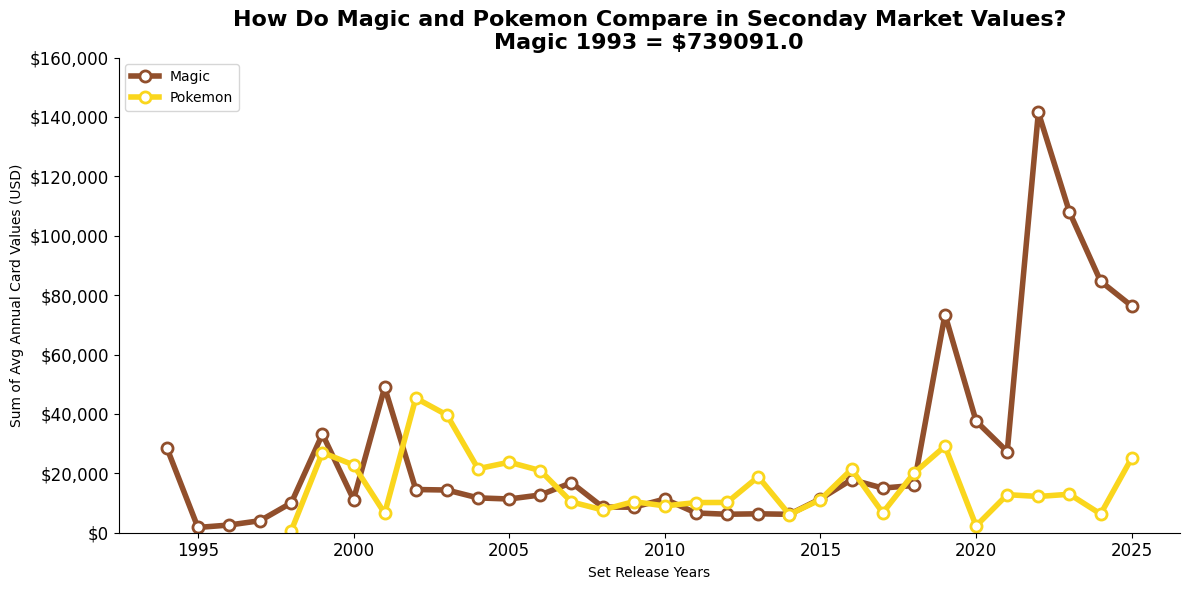

In [10]:
plt.figure(figsize=(12,6))

df4_no1993 = dfm4[dfm4['releaseYear'] != 1993]
sum_per_year_no1993 = df4_no1993.groupby("releaseYear")["avgPrice"].sum().reset_index()
sumPerYearPokemon = dfp2.groupby("releaseYear")["marketPrice"].sum().reset_index()

plt.plot(sum_per_year_no1993["releaseYear"], sum_per_year_no1993["avgPrice"], color="#914F2C", linewidth=4, marker="o", markersize = 8, markerfacecolor = "#FFFFFF", 
         markeredgewidth = 2, label = 'Magic')
plt.plot(sumPerYearPokemon["releaseYear"], sumPerYearPokemon["marketPrice"], color="#FAD61D", linewidth=4, marker="o", markersize = 8, markerfacecolor = "#FFFFFF", 
         markeredgewidth = 2, label = "Pokemon")
plt.ylim(0, 160000)
plt.xlabel("Set Release Years")
plt.ylabel("Sum of Avg Annual Card Values (USD)")

value_1993 = dfm4.loc[dfm4["releaseYear"] == 1993, "avgPrice"].sum().round()
plt.title(f"How Do Magic and Pokemon Compare in Seconday Market Values?\nMagic 1993 = ${value_1993}", fontsize=16, fontweight="bold", color="black")

ax = plt.gca()
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'${x:,.0f}')) # to show thousands comma for y-axis

sns.despine()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

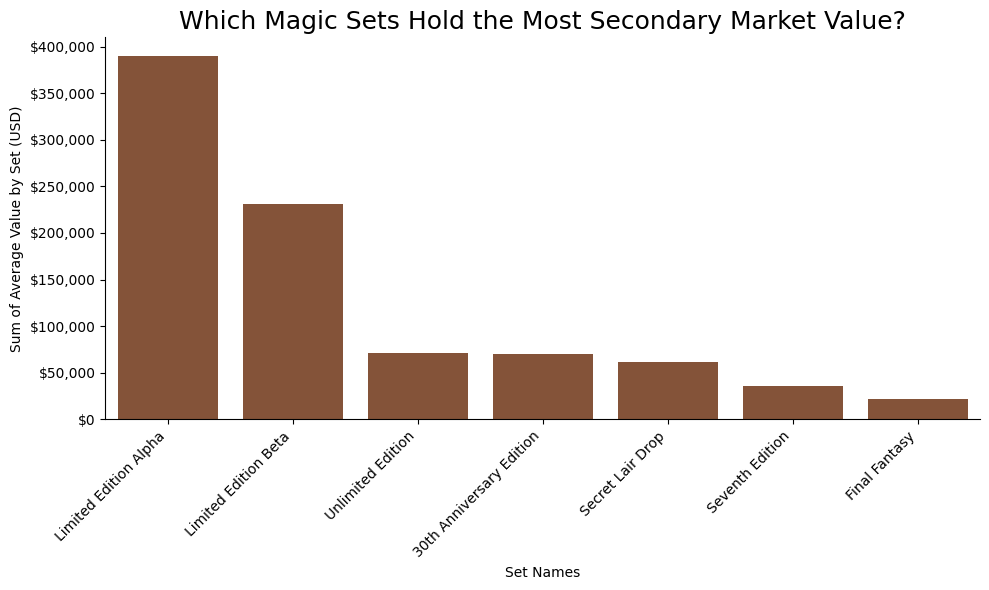

In [7]:
# set comparison magic
setAvg = dfm4.groupby('setName')['avgPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
# plt.bar(setAvg.index, setAvg.values, color = '#914F2C', width = 0.8)
#sns.barplot(setAvg, color = '#914F2C', width = 0.8)
sns.barplot(setAvg, color = '#914F2C', width = 0.8)
plt.title('Which Magic Sets Hold the Most Secondary Market Value?', fontsize=18)
plt.xlabel("Set Names")
plt.ylabel("Sum of Average Value by Set (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha="right")

ax = plt.gca()
ax.set_xlim([-0.5, 6.5])
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'${x:,.0f}'))

sns.despine()
plt.tight_layout()
plt.show()

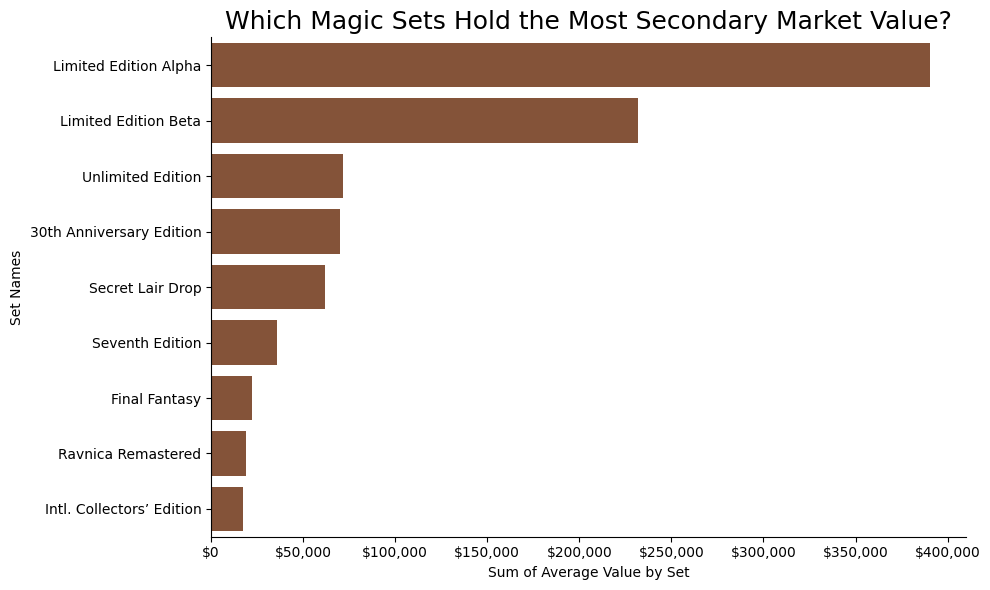

In [8]:
setAvg2 = dfm4.groupby('setName')['avgPrice'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))

sns.barplot(setAvg2, color = '#914F2C', width = 0.8, orient = 'h')
plt.title('Which Magic Sets Hold the Most Secondary Market Value?', fontsize=18)
plt.xlabel("Sum of Average Value by Set")
plt.ylabel("Set Names")

ax = plt.gca()
ax.set_ylim([8.5, -0.5])
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'${x:,.0f}'))

sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
# group comparison pokemon